In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/train_data_new.csv')
test_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/test_data_new.csv')

In [3]:
train_data.head()

,team_wicket_loss_average,team_count_50runs_last15,team_winp_last5,team_bowler_performance_ratio,team_strike_rate,team_avg_wicket,team_batting_strength,team_win_rate_at_venue,team_batsman_performance_index,team_overall_win_rate,...,team_avg_eco,team_avg_score_ground_ratio,avg_score_ground_batting_first_ratio,match_experience_score_ratio,boundary_frequency_ratio,avg_runs_powerplay_ratio,total_wickets_bowlers_recent_ratio,total_runs_top_batsmen_recent_ratio,total_runs_top_batsmen_ratio,winner_01
0,-1.368785,1.210788,0.672131,1.244528,2.148438,1.238807,1.173089,7.071068e-01,1.972308,-0.083475,...,-0.554419,-0.104744,0.046338,1.368785,0.738186,0.115396,1.316632,1.178372,1.478076,1
1,-1.041201,0.564618,1.952381,-0.461919,-1.112081,-0.521669,-0.091446,1.490116e-08,-1.107182,0.854515,...,-0.285641,0.191746,0.416732,0.975199,-0.595941,0.247339,-0.893293,-0.088788,1.107182,0
2,0.485610,-0.232356,0.672131,0.615018,-0.497557,0.352594,-0.035741,1.490116e-08,-0.369545,-0.667032,...,-0.172086,0.349779,-0.418176,-1.494046,-0.244610,-0.470772,0.618219,-0.035741,-1.396318,0
3,0.003970,1.432296,1.975610,-0.485610,1.162619,-0.527744,1.285775,1.490116e-08,0.762741,0.324563,...,-0.531796,0.274726,1.279749,-0.453102,0.375219,0.913194,-0.406649,1.291848,-0.220136,0
4,1.589567,-0.294019,1.327869,0.366713,0.222848,0.041039,-0.080819,1.000000e+00,0.225562,-0.738186,...,0.204372,-0.776981,-0.846914,-0.435573,-0.476694,0.521669,0.068874,0.206596,-0.461919,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density(train_data, test_data, column_name):

    title = f"'Density Plot of {column_name}"
    xlabel = column_name
    ylabel = 'Density'
   
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train_data[column_name], fill=True, label='Train Data')
    sns.kdeplot(test_data[column_name], fill=True, label='Test Data')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [5]:
# plot_density(train_data, test_data, 'team_wicket_loss_average')

In [6]:
# for col in train_data.columns:
#     plot_density(train_data, test_data, col)

In [7]:
train_data.corr()['winner_01'].sort_values()

avg_score_ground_batting_first_ratio   -0.226530
team_avg_score_ground_ratio            -0.219863
team_win_percentage_fielding_first     -0.219447
match_experience_score_ratio           -0.219131
team_batting_strength                  -0.190013
total_runs_top_batsmen_recent_ratio    -0.186817
team_batsman_runs_recent               -0.186817
total_runs_top_batsmen_ratio           -0.182399
team_bowler_performance_ratio          -0.166911
team_batsman_performance_recent        -0.160832
team_avg_wicket                        -0.157641
team_pom_frequency                     -0.157227
team_avg_wickets_top5_bowlers          -0.151704
team_count_50runs_last15               -0.147812
total_wickets_bowlers_recent_ratio     -0.145209
boundary_frequency_ratio               -0.143416
avg_runs_powerplay_ratio               -0.142774
team_strike_rate                       -0.132729
team_count_100runs_ratio_last15        -0.126637
team_batsman_performance_index         -0.110905
team_SR             

## Feature Selection

### 1. Recursive Feature Elimination (RFE)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# Define the features and target variable
X = train_data.drop('winner_01', axis=1)  # Assuming 'winner_01' is the target variable
y = train_data['winner_01']

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the dataset into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_imputed_df, y, test_size=0.0, random_state=42)
X_train = X_imputed_df
y_train = y

# Create a RandomForest classifier to use with RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE with RandomForest for the top 15 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected features:", selected_features)

# Model training can be done here using the selected features
# For example:
# X_train_selected = X_train[selected_features]
# X_val_selected = X_val[selected_features]


Selected features: Index(['team_bowler_performance_ratio', 'team_batting_strength',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio'],
      dtype='object')


Selected features: Index(['team_bowler_performance_ratio', 'team_strike_rate', 'team_avg_wicket',
       'team_batting_strength', 'team_batsman_performance_recent',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio', 'boundary_frequency_ratio',
       'avg_runs_powerplay_ratio'],
      dtype='object')

## Model

In [9]:
train_data.fillna(0, inplace=True)
df = train_data[selected_features]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df
y = train_data['winner_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((758, 10), (758,), (190, 10), (190,))

In [10]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

### Catboost

In [11]:
catboost_parms = {'iterations': 90, 
                  'learning_rate': 0.00018252773305712697, 
                  'depth': 6, 
                  'l2_leaf_reg': 0.0012314643153008098, 
                  'border_count': 108,
                  'bagging_temperature': 0.046217755894046024, 
                  'random_strength': 0.1058457108867618, 
                  'od_type': 'Iter', 
                  'od_wait': 40}

best_catboost = CatBoostClassifier(**catboost_parms)

best_catboost.fit(X_train, y_train)

pred_train = best_catboost.predict(X_train)
print(f"Accuracy on train data: {accuracy_score(y_train, pred_train)}")

pred_test = best_catboost.predict(X_test)
print(f"Accuracy on test data: {accuracy_score(y_test, pred_test)}")

0:	learn: 0.6931185	total: 101ms	remaining: 9.01s
1:	learn: 0.6930909	total: 104ms	remaining: 4.59s
2:	learn: 0.6930555	total: 118ms	remaining: 3.42s
3:	learn: 0.6930182	total: 119ms	remaining: 2.56s
4:	learn: 0.6929885	total: 120ms	remaining: 2.03s
5:	learn: 0.6929587	total: 120ms	remaining: 1.68s
6:	learn: 0.6929320	total: 121ms	remaining: 1.43s
7:	learn: 0.6928977	total: 121ms	remaining: 1.24s
8:	learn: 0.6928654	total: 122ms	remaining: 1.1s
9:	learn: 0.6928314	total: 122ms	remaining: 980ms
10:	learn: 0.6928024	total: 123ms	remaining: 883ms
11:	learn: 0.6927667	total: 124ms	remaining: 804ms
12:	learn: 0.6927324	total: 124ms	remaining: 737ms
13:	learn: 0.6926967	total: 125ms	remaining: 678ms
14:	learn: 0.6926668	total: 125ms	remaining: 627ms
15:	learn: 0.6926374	total: 126ms	remaining: 582ms
16:	learn: 0.6926084	total: 126ms	remaining: 542ms
17:	learn: 0.6925791	total: 127ms	remaining: 507ms
18:	learn: 0.6925475	total: 127ms	remaining: 476ms
19:	learn: 0.6925132	total: 128ms	remainin

### XGB

In [12]:
XGB_test_parms = {'n_estimators': 326, 
                  'learning_rate': 0.010532637453626644, 
                  'max_depth': 3, 'subsample': 0.9862607557594826, 
                  'colsample_bytree': 0.9436337677318771, 
                  'gamma': 5.6007824673093254e-08, 
                  'reg_alpha': 5.725774830437165e-08, 
                  'reg_lambda': 0.002046526256832003}

best_xgb = XGBClassifier(**XGB_test_parms)

best_xgb.fit(X_train, y_train)

pred_train = best_xgb.predict(X_train)
print(f"Accuracy on train data: {accuracy_score(y_train, pred_train)}")

pred_test = best_xgb.predict(X_test)
print(f"Accuracy on test data: {accuracy_score(y_test, pred_test)}")

Accuracy on train data: 0.758575197889182
Accuracy on test data: 0.7105263157894737


## Ensemble

### Averaging

In [13]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize the models with the specified parameters
catboost_params = {
    'iterations': 90, 
    'learning_rate': 0.00018252773305712697, 
    'depth': 6, 
    'l2_leaf_reg': 0.0012314643153008098, 
    'border_count': 108,
    'bagging_temperature': 0.046217755894046024, 
    'random_strength': 0.1058457108867618, 
    'od_type': 'Iter', 
    'od_wait': 40
}

xgb_params = {
    'n_estimators': 326, 
    'learning_rate': 0.010532637453626644, 
    'max_depth': 3, 
    'subsample': 0.9862607557594826, 
    'colsample_bytree': 0.9436337677318771, 
    'gamma': 5.6007824673093254e-08, 
    'reg_alpha': 5.725774830437165e-08, 
    'reg_lambda': 0.002046526256832003
}

catboost_model = CatBoostClassifier(**catboost_params)
xgb_model = XGBClassifier(**xgb_params)

# Fit models
catboost_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict probabilities
catboost_probs = catboost_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Average the probabilities
ensemble_probs = (catboost_probs + xgb_probs) / 2

# Convert probabilities to final predictions based on a threshold
threshold = 0.5
ensemble_predictions = (ensemble_probs >= threshold).astype(int)

# Assess the ensemble's performance
from sklearn.metrics import accuracy_score
print("Catboost Model Accuracy:", accuracy_score(y_test, catboost_model.predict(X_test)))
print("XGB Model Accuracy:", accuracy_score(y_test, xgb_model.predict(X_test)))
print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_predictions))

0:	learn: 0.6931185	total: 1.08ms	remaining: 95.9ms
1:	learn: 0.6930909	total: 1.89ms	remaining: 83.1ms
2:	learn: 0.6930555	total: 2.44ms	remaining: 70.9ms
3:	learn: 0.6930182	total: 2.96ms	remaining: 63.7ms
4:	learn: 0.6929885	total: 3.46ms	remaining: 58.8ms
5:	learn: 0.6929587	total: 3.98ms	remaining: 55.7ms
6:	learn: 0.6929320	total: 4.59ms	remaining: 54.4ms
7:	learn: 0.6928977	total: 5.11ms	remaining: 52.4ms
8:	learn: 0.6928654	total: 5.8ms	remaining: 52.2ms
9:	learn: 0.6928314	total: 6.33ms	remaining: 50.7ms
10:	learn: 0.6928024	total: 7.11ms	remaining: 51.1ms
11:	learn: 0.6927667	total: 7.76ms	remaining: 50.5ms
12:	learn: 0.6927324	total: 8.44ms	remaining: 50ms
13:	learn: 0.6926967	total: 9.03ms	remaining: 49ms
14:	learn: 0.6926668	total: 9.6ms	remaining: 48ms
15:	learn: 0.6926374	total: 10.1ms	remaining: 46.7ms
16:	learn: 0.6926084	total: 10.7ms	remaining: 46.1ms
17:	learn: 0.6925791	total: 11.3ms	remaining: 45.2ms
18:	learn: 0.6925475	total: 11.8ms	remaining: 44.1ms
19:	learn: 

### Stacking

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the stacking ensemble
estimators = [
    ('catboost', CatBoostClassifier(**catboost_params)),
    ('xgb', XGBClassifier(**xgb_params))
]

# The final meta-model is often a simple model like logistic regression
clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)

# Fit the stacking model
clf.fit(X_train, y_train)

# Predict and evaluate
stacking_predictions = clf.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_predictions))

0:	learn: 0.6931185	total: 605us	remaining: 53.9ms
1:	learn: 0.6930909	total: 1.25ms	remaining: 55.2ms
2:	learn: 0.6930555	total: 1.85ms	remaining: 53.7ms
3:	learn: 0.6930182	total: 2.37ms	remaining: 50.9ms
4:	learn: 0.6929885	total: 2.98ms	remaining: 50.6ms
5:	learn: 0.6929587	total: 3.5ms	remaining: 49ms
6:	learn: 0.6929320	total: 4.06ms	remaining: 48.1ms
7:	learn: 0.6928977	total: 4.53ms	remaining: 46.5ms
8:	learn: 0.6928654	total: 5.14ms	remaining: 46.3ms
9:	learn: 0.6928314	total: 5.58ms	remaining: 44.6ms
10:	learn: 0.6928024	total: 6.05ms	remaining: 43.5ms
11:	learn: 0.6927667	total: 6.62ms	remaining: 43ms
12:	learn: 0.6927324	total: 7.29ms	remaining: 43.2ms
13:	learn: 0.6926967	total: 7.78ms	remaining: 42.3ms
14:	learn: 0.6926668	total: 8.32ms	remaining: 41.6ms
15:	learn: 0.6926374	total: 8.85ms	remaining: 40.9ms
16:	learn: 0.6926084	total: 9.32ms	remaining: 40ms
17:	learn: 0.6925791	total: 9.8ms	remaining: 39.2ms
18:	learn: 0.6925475	total: 10.3ms	remaining: 38.5ms
19:	learn: 0

In [15]:
# df_pred = pd.DataFrame()

## Check

In [39]:
df_test = test_data[selected_features]
df_test.fillna(0, inplace=True)

scaler = StandardScaler()
X= scaler.fit_transform(X)
test = scaler.transform(df_test)

/var/folders/z7/t3qmw89j637f4y58ls6cb_vh0000gn/T/ipykernel_78658/1287964554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(0, inplace=True)
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [60]:
check_model = catboost_model

In [61]:
check_model.fit(X, y)

pred_train = check_model.predict(X)
print(f"Accuracy on train data: {accuracy_score(y, pred_train)}")

0:	learn: 0.6931181	total: 3.59ms	remaining: 320ms
1:	learn: 0.6930871	total: 4.53ms	remaining: 199ms
2:	learn: 0.6930549	total: 5.23ms	remaining: 152ms
3:	learn: 0.6930248	total: 5.79ms	remaining: 124ms
4:	learn: 0.6929942	total: 6.32ms	remaining: 107ms
5:	learn: 0.6929619	total: 7.04ms	remaining: 98.5ms
6:	learn: 0.6929315	total: 7.84ms	remaining: 93ms
7:	learn: 0.6929025	total: 8.91ms	remaining: 91.4ms
8:	learn: 0.6928716	total: 9.69ms	remaining: 87.2ms
9:	learn: 0.6928391	total: 10.5ms	remaining: 83.8ms
10:	learn: 0.6928112	total: 11.2ms	remaining: 80.2ms
11:	learn: 0.6927828	total: 11.8ms	remaining: 76.7ms
12:	learn: 0.6927512	total: 12.4ms	remaining: 73.2ms
13:	learn: 0.6927212	total: 13ms	remaining: 70.5ms
14:	learn: 0.6926880	total: 13.6ms	remaining: 68.2ms
15:	learn: 0.6926623	total: 14.3ms	remaining: 66.1ms
16:	learn: 0.6926310	total: 14.8ms	remaining: 63.6ms
17:	learn: 0.6926004	total: 15.4ms	remaining: 61.7ms
18:	learn: 0.6925704	total: 15.9ms	remaining: 59.6ms
19:	learn: 0

In [62]:
best_pred = np.array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
                    0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                    0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
                    0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
                    0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                    0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                    0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
                    1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
                    1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
                    0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
                    1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
                    0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                    0, 0, 1, 1, 0, 0, 0])

In [63]:
preds = check_model.predict(test)

In [64]:
preds

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0])

In [65]:
(preds!=best_pred).sum()

31

In [66]:
result = np.where(best_pred != preds, -1, 0)

In [67]:
result

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [68]:
pred_prob = check_model.predict_proba(test)

In [69]:
pred_prob

array([[0.49430182, 0.50569818],
       [0.50028161, 0.49971839],
       [0.49851629, 0.50148371],
       [0.50034872, 0.49965128],
       [0.50163046, 0.49836954],
       [0.50189185, 0.49810815],
       [0.49542503, 0.50457497],
       [0.50204158, 0.49795842],
       [0.50198111, 0.49801889],
       [0.50128923, 0.49871077],
       [0.50168213, 0.49831787],
       [0.50291332, 0.49708668],
       [0.49957418, 0.50042582],
       [0.50094349, 0.49905651],
       [0.4953885 , 0.5046115 ],
       [0.49825316, 0.50174684],
       [0.49661942, 0.50338058],
       [0.49797814, 0.50202186],
       [0.50062093, 0.49937907],
       [0.49766128, 0.50233872],
       [0.50121465, 0.49878535],
       [0.50203574, 0.49796426],
       [0.50161095, 0.49838905],
       [0.49442339, 0.50557661],
       [0.49539949, 0.50460051],
       [0.49580899, 0.50419101],
       [0.49578971, 0.50421029],
       [0.50121822, 0.49878178],
       [0.49548383, 0.50451617],
       [0.50249176, 0.49750824],
       [0.

In [70]:
pred_prob[:, 1]

array([0.50569818, 0.49971839, 0.50148371, 0.49965128, 0.49836954,
       0.49810815, 0.50457497, 0.49795842, 0.49801889, 0.49871077,
       0.49831787, 0.49708668, 0.50042582, 0.49905651, 0.5046115 ,
       0.50174684, 0.50338058, 0.50202186, 0.49937907, 0.50233872,
       0.49878535, 0.49796426, 0.49838905, 0.50557661, 0.50460051,
       0.50419101, 0.50421029, 0.49878178, 0.50451617, 0.49750824,
       0.50298092, 0.49735365, 0.49699708, 0.49978471, 0.49889296,
       0.49759102, 0.49743243, 0.50083453, 0.50085924, 0.49881222,
       0.49780159, 0.4988607 , 0.49699412, 0.49897932, 0.49887599,
       0.50418087, 0.50412733, 0.49772493, 0.50061118, 0.50353436,
       0.49894704, 0.50090064, 0.49716106, 0.50321509, 0.4978811 ,
       0.49903418, 0.50083574, 0.49924417, 0.50417171, 0.50186459,
       0.49832219, 0.49722078, 0.49779489, 0.49918407, 0.5016356 ,
       0.50427163, 0.49774292, 0.50395409, 0.49839717, 0.49850903,
       0.50142951, 0.50347853, 0.50063847, 0.50472795, 0.50518

/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


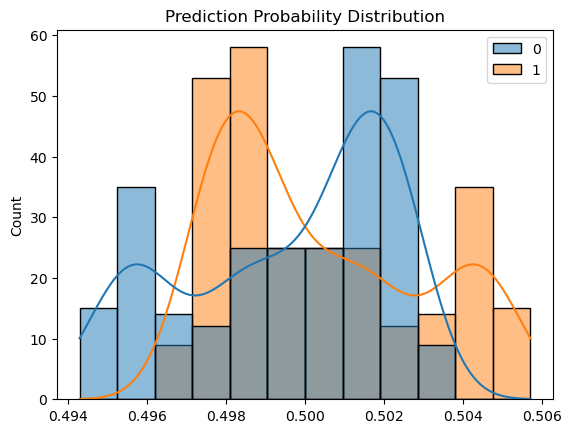

In [71]:
sns.histplot(pred_prob, kde=True)
plt.title('Prediction Probability Distribution')
plt.show()

In [72]:
df_test = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/main/6644a1e287df6_test_data_with_samplefeatures.csv')
df_test['winner'] = preds
# df_test['win_pred_score'] = np.max(pred_proba, axis=1)

winner_id = []
for i in range(len(df_test)):
  if df_test['winner'][i] == 0:
    winner_id.append(df_test['team1_id'][i])
  else:
    winner_id.append(df_test['team2_id'][i])

df_test['win_pred_team_id'] = winner_id

In [73]:
df_test.to_csv('check.csv', index=False)

## Combine

In [74]:
# df_test.to_csv('check.csv', index=False)

In [75]:
# df_pred['Catboost_pred'] = preds

In [76]:
# df_pred['XGB_pred'] = preds

In [77]:
# df_pred.head()

In [78]:
# (df_pred['Catboost_pred'] != df_pred['XGB_pred']).sum()

In [79]:
# np.where(df_pred['Catboost_pred'] != df_pred['XGB_pred'], -1, 0)